In [1]:
!pip install -U textblob
!pip install vaderSentiment
!python -m textblob.download_corpora
!pip install tabulate
!pip install spacy

Finished.

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\thuyd\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thuyd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thuyd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\thuyd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\thuyd\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\thuyd\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

### Polarity, negative, positive, comp

In [141]:
animes_df2 = pd.read_csv("animes_df2.csv")
animes_df2.head()

,Unnamed: 0,title,synopsis,genre,adult
0,0,Haikyuu Second Season,following participation inter-high high school...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",1
1,1,Shigatsu wa Kimi no Uso,music accompanies path human metronome prodigi...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...",1
2,2,Made in Abyss,abyss gaping chasm stretching depths earth fil...,"['Sci', 'Fi', 'Adventure', 'Mystery', 'Drama',...",0
3,3,Fullmetal Alchemist Brotherhood,order something obtained something equal value...,"['Action', 'Military', 'Adventure', 'Comedy', ...",1
4,4,Kizumonogatari III Reiketsu-hen,helping revive legendary vampire kiss-shot hea...,"['Action', 'Mystery', 'Supernatural', 'Vampire']",1


In [105]:
vader = SentimentIntensityAnalyzer()

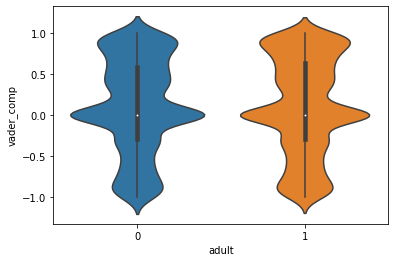

In [25]:
def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']
animes_df2['vader_comp'] = animes_df2.synopsis.apply(detect_vader_comp)
# Visualize vader_comp
ax = sns.violinplot(x="adult", y="vader_comp", data=animes_df2)

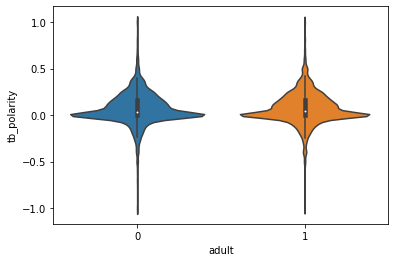

In [26]:
def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity
animes_df2['tb_polarity'] = animes_df2.synopsis.apply(detect_tb_polarity)
# Visualize vader_comp
ax = sns.violinplot(x="adult", y="tb_polarity", data=animes_df2)

In [142]:
animes_df2

,Unnamed: 0,title,synopsis,genre,adult
0,0,Haikyuu Second Season,following participation inter-high high school...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",1
1,1,Shigatsu wa Kimi no Uso,music accompanies path human metronome prodigi...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...",1
2,2,Made in Abyss,abyss gaping chasm stretching depths earth fil...,"['Sci', 'Fi', 'Adventure', 'Mystery', 'Drama',...",0
3,3,Fullmetal Alchemist Brotherhood,order something obtained something equal value...,"['Action', 'Military', 'Adventure', 'Comedy', ...",1
4,4,Kizumonogatari III Reiketsu-hen,helping revive legendary vampire kiss-shot hea...,"['Action', 'Mystery', 'Supernatural', 'Vampire']",1
...,...,...,...,...,...
13741,13741,Koisuru Boukun,love upperclassman even manages confess love b...,"['Comedy', 'Romance', 'Yaoi']",1
13742,13742,Tentou Mushi no Uta,adventures seven orphan live poverty although ...,"['Drama', 'Slice', 'of', 'Life']",0
13743,13743,Koakuma Kanojo The Animation,rumored mysterious exists whoever dares watch ...,"['Hentai', 'Supernatural', 'School']",1
13744,13744,Tamayura More Aggressive Picture Drama,picture drama included 1st volumes,"['Comedy', 'Drama']",0


In [28]:
animes_sp = animes_df2.copy()
tb_pred = pd.cut(animes_sp['tb_polarity'], bins=2, labels=[0, 1])
print("Confusion Matrix:\n", confusion_matrix(animes_sp.adult, tb_pred))
print("F1 score:", f1_score(animes_sp.adult, tb_pred, average='micro'))

Confusion Matrix:
 [[2304 2911]
 [3545 4986]]
F1 score: 0.5303360977738979


### Pre-processing for sentimental analysis

In [151]:
df_sample = animes_df2.copy()
df_sample

,Unnamed: 0,title,synopsis,genre,adult
0,0,Haikyuu Second Season,following participation inter-high high school...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",1
1,1,Shigatsu wa Kimi no Uso,music accompanies path human metronome prodigi...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...",1
2,2,Made in Abyss,abyss gaping chasm stretching depths earth fil...,"['Sci', 'Fi', 'Adventure', 'Mystery', 'Drama',...",0
3,3,Fullmetal Alchemist Brotherhood,order something obtained something equal value...,"['Action', 'Military', 'Adventure', 'Comedy', ...",1
4,4,Kizumonogatari III Reiketsu-hen,helping revive legendary vampire kiss-shot hea...,"['Action', 'Mystery', 'Supernatural', 'Vampire']",1
...,...,...,...,...,...
13741,13741,Koisuru Boukun,love upperclassman even manages confess love b...,"['Comedy', 'Romance', 'Yaoi']",1
13742,13742,Tentou Mushi no Uta,adventures seven orphan live poverty although ...,"['Drama', 'Slice', 'of', 'Life']",0
13743,13743,Koakuma Kanojo The Animation,rumored mysterious exists whoever dares watch ...,"['Hentai', 'Supernatural', 'School']",1
13744,13744,Tamayura More Aggressive Picture Drama,picture drama included 1st volumes,"['Comedy', 'Drama']",0


In [112]:
#import re
#import nltk

In [69]:
#df_sample["synopsis"] = df_sample["synopsis"].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

In [119]:
#def contractions(s):
#  s = re.sub(r"won’t", "will not",s)
#  s = re.sub(r"would’t", "would not",s)
#  s = re.sub(r"could’t", "could not",s)
#  s = re.sub(r"\’d", "would",s)
#  s = re.sub(r"can\’t", "can not",s)
#  s = re.sub(r"n\’t", "not", s)
#  s= re.sub(r"\’re", "are", s)
#  s = re.sub(r"\’s", "is", s)
#  s = re.sub(r"\’ll", "will", s)
#  s = re.sub(r"\’t", "not", s)
#  s = re.sub(r"\’ve", "have", s)
#  s = re.sub(r"\’m", "am", s)
#  return s
#df_sample["synopsis"]=df_sample["synopsis"].apply(lambda x:contractions(x))

In [146]:
#df_sample["synopsis"]=df_sample["synopsis"].apply(lambda x: " ".join([re.sub("[^A-Za-z]+","", x) for x in nltk.word_tokenize(x)]))

### Lemmatization

In [152]:
df_sample= df_sample.astype({"synopsis": str})

In [153]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df_sample["synopsis"]=df_sample["synopsis"].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

### Apply models

In [169]:
df_x = df_sample.synopsis
df_y = df_sample.adult
x_train, x_test, y_train, y_test = train_test_split(
            df_x, df_y, test_size = 0.3, random_state=42)

In [170]:
tv = TfidfVectorizer(stop_words='english', lowercase=True);
tv.fit(train.synopsis)

TfidfVectorizer(stop_words='english')

In [171]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=200)
#modelRF.fit(tv.transform(train.synopsis), train.adult)
#nb_pred_RF = modelRF.predict(tv.transform(test.synopsis))

#print("Confusion Matrix:\n", confusion_matrix(test.adult, nb_pred_RF))
#print("F1 score:", f1_score(test.adult, nb_pred_RF, average='micro'))

In [172]:
import eli5
from sklearn.pipeline import Pipeline, make_pipeline

In [173]:
rf_classifier = make_pipeline(tv, modelRF)
rf_classifier.fit(x_train, y_train)

rf_train_preds = rf_classifier.predict(x_train)
rf_train_f1 = f1_score(y_train, rf_train_preds, average='micro')
rf_test_preds = rf_classifier.predict(x_test)
rf_test_f1 = f1_score(y_test, rf_test_preds, average='micro')
print("Train/test F1 for Logistic Regression: ", rf_train_f1, rf_test_f1)

Train/test F1 for Logistic Regression:  0.965599667428809 0.6054801163918526


In [174]:
eli5.show_weights(rf_classifier, top=20, target_names=x_test[0])

Weight,Feature
0.0058 ± 0.0030,episode
0.0056 ± 0.0030,series
0.0056 ± 0.0033,video
0.0050 ± 0.0032,short
0.0043 ± 0.0027,film
0.0043 ± 0.0032,story
0.0042 ± 0.0030,music
0.0042 ± 0.0026,movie
0.0041 ± 0.0028,special
0.0041 ± 0.0034,based


In [176]:
eli5.show_prediction(modelRF, x_test.iloc[10], vec=tv, target_names=x_test[0])

In [157]:
# modelELR = MultinomialNB(alpha=0.1)
# modelELR.fit(tv.transform(train.synopsis), train.adult)
# elr_pred = modelELR.predict(tv.transform(test.synopsis))

# print("Confusion Matrix:\n", confusion_matrix(test.adult, elr_pred))
# print("F1 score:", f1_score(test.adult, elr_pred, average='micro'))

Confusion Matrix:
 [[ 331 1221]
 [ 402 2170]]
F1 score: 0.6064500484966052


In [66]:
# from sklearn.svm import LinearSVC
# clf = LinearSVC(random_state=0)
# clf.fit(tv.transform(train.synopsis),train.adult)
# y_test_pred=clf.predict(tv.transform(test.synopsis))

# from sklearn.metrics import classification_report
# report=classification_report(test.adult, y_test_pred,output_dict=True)
# report

{'0': {'precision': 0.41953562850280224,
  'recall': 0.3285266457680251,
  'f1-score': 0.36849507735583686,
  'support': 1595},
 '1': {'precision': 0.6274782608695653,
  'recall': 0.7133254250691973,
  'f1-score': 0.6676535899333828,
  'support': 2529},
 'accuracy': 0.5645004849660524,
 'macro avg': {'precision': 0.5235069446861838,
  'recall': 0.5209260354186112,
  'f1-score': 0.5180743336446099,
  'support': 4124},
 'weighted avg': {'precision': 0.5470542796316926,
  'recall': 0.5645004849660524,
  'f1-score': 0.5519509159369749,
  'support': 4124}}